# MAURITIUS DIGITIZED

In [1]:
import os,sys
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px

def load_ot(file, date_min='', date_max='', hour=False, var=False):
    #print(" Loading the observations table ")
    
    ot_columns = ['date_time' , 'z_coordinate', 'z_coordinate_type', 'observed_variable', 'observation_value', 'source_id', 'sensor_id' ]
    
    fb_col = ['']
    
    data = h5.File(file, 'r')
    
    # timestamps
    #record_ts = pd.to_datetime( data['recordtimestamp'] , unit='s',  origin=pd.Timestamp('1900-01-01') )
    #record_ind = data['recordindex']

    #df_timestamps = pd.DataFrame.from_dict ( {'recordtimestamp':record_ts , 'recordindex':record_ind } )
    
    ot={}
    for c in ot_columns:
        #print(c)
        if c in ['source_id', 'sensor_id']:
            #print(data['observations_table'][c][:3]) 
            ot[c] = [ b''.join(i).decode('utf-8') for i in data['observations_table'][c][:] ] 
            #print(ot[c])
        else:
            if c in ['date_time']:
                ot[c] = pd.to_datetime( data['observations_table']['date_time'][:], unit='s',  origin=pd.Timestamp('1900-01-01') )
            else:
                ot[c] = data['observations_table'][c][:] 

    #for k in ot.keys():
    #    print(k, len(ot[k]) )
              
    #print("Creating Dataframe")
    ot = pd.DataFrame.from_dict(ot)
    
    #ot['hour'] = ot.date_time.dt.hour 
    
    if hour:
        ot = ot.loc[ abs(ot.hour - hour) <2 ]
    
    if var:
        ot = ot.loc[ot.observed_variable == var ]

    #ot = ot.loc[ot.z_coordinate_type == 1 ]

    #ot = ot.sort_values(by=['z_coordinate'])
                        
    ot = ot.dropna(subset = ['observation_value'])
                
    return ot

In [2]:

files = [f for f in os.listdir('/users/staff/federico/GitHub/CEUAS_master_JULY2922/CEUAS/CEUAS/public/harvest/code_cop2/COP2/mauritius_digitized/0-20000-0-61995') if 'processed' not in f and 'on.nc' not in f ]
files

['0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_Graw.nc',
 '0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_Graw-GPS.nc',
 '0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_MKII.nc',
 '0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_Meisei.nc',
 '0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_Modem.nc',
 '0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_SRS.nc',
 '0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_Sip.nc',
 '0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_Vaisala.nc']

In [3]:
files

['0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_Graw.nc',
 '0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_Graw-GPS.nc',
 '0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_MKII.nc',
 '0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_Meisei.nc',
 '0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_Modem.nc',
 '0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_SRS.nc',
 '0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_Sip.nc',
 '0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison_Vaisala.nc']

In [4]:
f = '/users/staff/federico/GitHub/CEUAS_master_JULY2922/CEUAS/CEUAS/public/harvest/code_cop2/COP2/mauritius_digitized/0-20000-0-61995/0-20000-0-61995_2005_mauritius_digitized_harvested_mauritius_2005_intercomparison.nc'
ot = load_ot(f)




In [5]:
ot.head()

date_time  z_coordinate  z_coordinate_type  observed_variable  \
0 2005-02-07 10:01:53    424.940887                  1                138   
1 2005-02-07 10:01:53    424.940887                  1                126   
2 2005-02-07 10:01:53    425.748505                  1                138   
3 2005-02-07 10:01:53    425.748505                  1                126   
4 2005-02-07 10:01:53    429.078003                  1                138   

   observation_value source_id   sensor_id  
0           0.669984       nan      Meisei  
1         300.136505       nan      Meisei  
2           0.735926       nan       Modem  
3         299.469666       nan       Modem  
4           0.650482       nan      Meisei

In [6]:
sensors = np.unique(ot.sensor_id )
print(sensors)
dates = np.unique(ot.date_time )
dates[:10]

date = dates[0]
ot_r = ot.loc[ (ot.observed_variable == 126) & (ot.date_time == date) ]

# 2005-02-22T15:01:57.000000000 

ot_r = ot.loc[ (ot.observed_variable == 126) & (ot.date_time == '2005-02-22T15:01:57.000000000') ]

['       SRS' '       Sip' '      Graw' '      MKII' '     Modem'
 '    Meisei' '   Vaisala' '  Graw-GPS' 'Vaisala-GP']


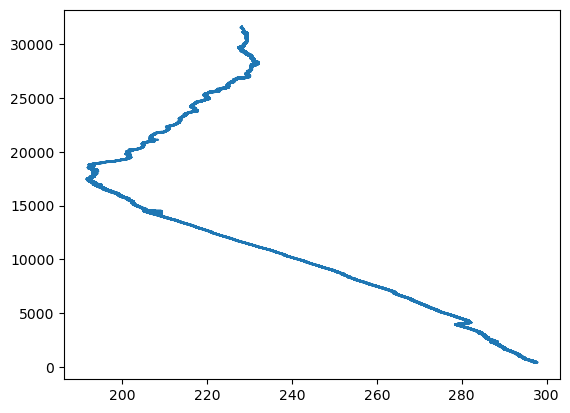

In [7]:
plt.plot(ot_r.observation_value , ot_r.z_coordinate)

In [8]:
for dt in np.unique(ot.date_time):
    
    df_r = ot.loc[ot.date_time == dt ]
    print(dt, np.unique( df_r.sensor_id ) )

2005-02-07T10:01:53.000000000 ['     Modem' '    Meisei' '   Vaisala' 'Vaisala-GP']
2005-02-07T14:57:50.000000000 ['       SRS' '       Sip' '      Graw' '   Vaisala' '  Graw-GPS'
 'Vaisala-GP']
2005-02-07T19:31:41.000000000 ['     Modem' '    Meisei' '   Vaisala' 'Vaisala-GP']
2005-02-08T05:13:16.000000000 ['       SRS' '       Sip' '      Graw' '   Vaisala' '  Graw-GPS'
 'Vaisala-GP']
2005-02-08T10:00:56.000000000 ['     Modem' '    Meisei' '   Vaisala' 'Vaisala-GP']
2005-02-08T15:03:03.000000000 ['       Sip' '      Graw' '   Vaisala' '  Graw-GPS' 'Vaisala-GP']
2005-02-08T19:33:03.000000000 ['       SRS' '     Modem' '    Meisei' '   Vaisala' 'Vaisala-GP']
2005-02-09T05:12:00.000000000 ['       Sip' '      Graw' '   Vaisala' '  Graw-GPS' 'Vaisala-GP']
2005-02-09T10:05:05.000000000 ['       SRS' '     Modem' '    Meisei' '   Vaisala' 'Vaisala-GP']
2005-02-09T14:59:48.000000000 ['       SRS' '       Sip' '      Graw' '   Vaisala' '  Graw-GPS'
 'Vaisala-GP']
2005-02-09T19:17:51.0000000

In [9]:
ot_r = ot.loc[ (ot.observed_variable == 126) & (ot.date_time == '2005-02-22T15:01:57.000000000') ]

ot_r.head()

import plotly.express as px

#df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(ot_r, x="observation_value", y="z_coordinate", color='sensor_id',
              width=1200, height=900)
#fig.show()

In [10]:
files = ['/users/staff/federico/GitHub/CEUAS_master_JULY2922/CEUAS/CEUAS/public/harvest/code_cop2/COP2/mauritius_digitized/0-20000-0-61995/' + f for f in os.listdir('/users/staff/federico/GitHub/CEUAS_master_JULY2922/CEUAS/CEUAS/public/harvest/code_cop2/COP2/mauritius_digitized/0-20000-0-61995') if 'processed' not in f and 'on.nc' not in f ]

all_df = []
for f in files:
    
    ot = load_ot(f)
    all_df.append(ot)
    
DF = pd.concat(all_df)

In [11]:
print(np.unique(DF.sensor_id))

['       SRS' '       Sip' '      Graw' '      MKII' '     Modem'
 '    Meisei' '   Vaisala' '  Graw-GPS']


In [12]:
for dt in np.unique(DF.date_time):
    
    dd = DF.loc[DF.date_time == dt ]
    print(dt, np.unique( dd.sensor_id ) )

2005-02-07T10:01:53.000000000 ['     Modem' '    Meisei' '   Vaisala']
2005-02-07T14:57:50.000000000 ['       SRS' '       Sip' '      Graw' '   Vaisala' '  Graw-GPS']
2005-02-07T19:31:41.000000000 ['     Modem' '    Meisei' '   Vaisala']
2005-02-08T05:13:16.000000000 ['       SRS' '       Sip' '      Graw' '   Vaisala' '  Graw-GPS']
2005-02-08T10:00:56.000000000 ['     Modem' '    Meisei' '   Vaisala']
2005-02-08T15:03:03.000000000 ['       Sip' '      Graw' '   Vaisala' '  Graw-GPS']
2005-02-08T19:33:03.000000000 ['       SRS' '     Modem' '    Meisei' '   Vaisala']
2005-02-09T05:12:00.000000000 ['       Sip' '      Graw' '   Vaisala' '  Graw-GPS']
2005-02-09T10:05:05.000000000 ['       SRS' '     Modem' '    Meisei' '   Vaisala']
2005-02-09T14:59:48.000000000 ['       SRS' '       Sip' '      Graw' '   Vaisala' '  Graw-GPS']
2005-02-09T19:17:51.000000000 ['     Modem' '    Meisei' '   Vaisala']
2005-02-10T05:02:13.000000000 ['       SRS' '       Sip' '      Graw' '   Vaisala' '  Gra

In [13]:
DF = DF.loc[ (DF.observed_variable == 126) & (DF.date_time == '2005-02-22T15:01:57.000000000') ]

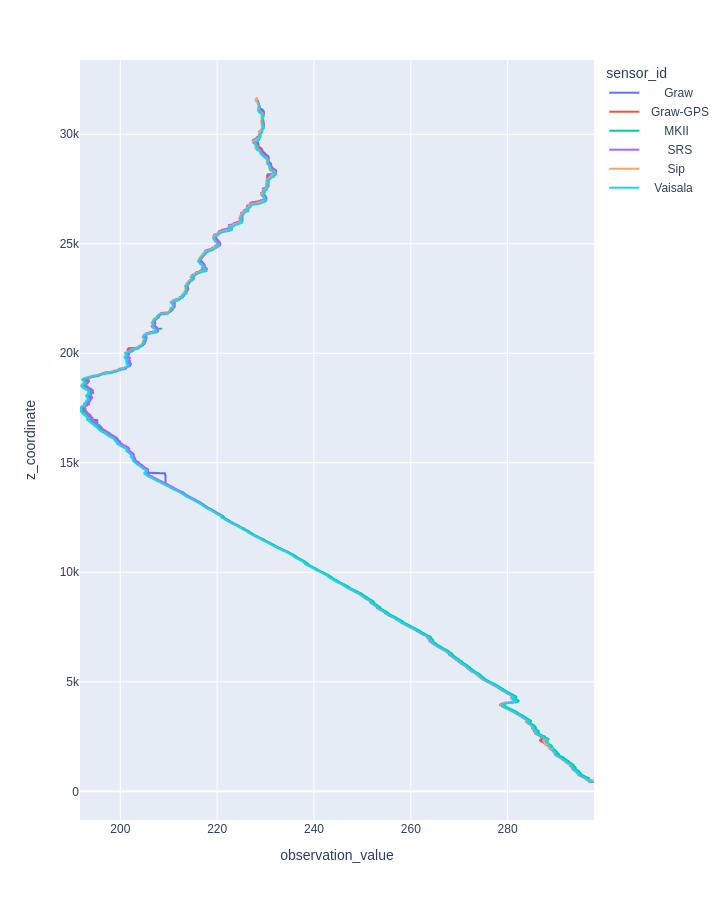

In [14]:
#df = px.data.gapminder().query("continent=='Oceania'")

fig = px.line(DF, x="observation_value", y="z_coordinate", color='sensor_id',
              width=1200, height=900)


fig.show()

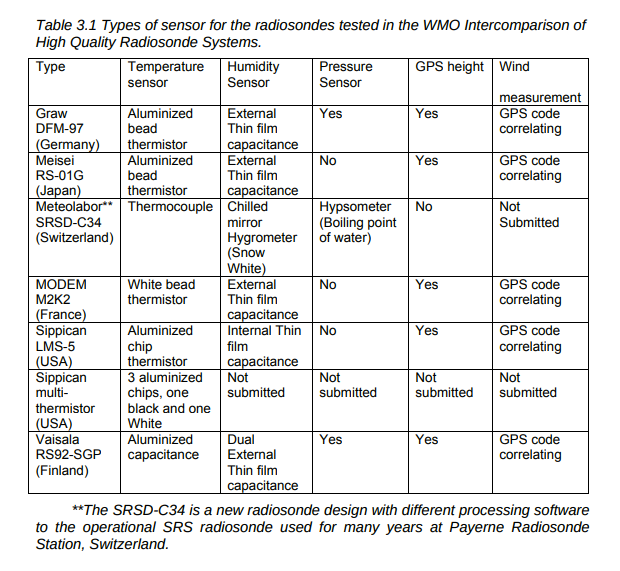

In [17]:
['       SRS' '       Sip' '      Graw' '      MKII' '     Modem'
 '    Meisei' '   Vaisala' '  Graw-GPS']

['       SRS       Sip      Graw      MKII     Modem    Meisei   Vaisala  Graw-GPS']

# Graw DFM-97

# MEISEI RS-01G

# METEOLABOR SRSD-C34

# MODEM M2K2

# SIPPICAN LMS-5

# SIPPICAN multithermistor


In [ ]:
3024								b'ZSm'	b'  ZSm Sippican LMS6 model 1848-611 multithermistor radiosonde 400-406 MHz GPS^ <F=T400-406DL,P=0,T=3(?)TC,U=A,N=G>'



# VAISALA RS92-SGP

In [ ]:
1147								b'LV6'	b'  LV6 Vaisala RS92-SGP sonde with NS921 radioactivity sensor kit {~2005}^'
2634								b'VN2'	b'  VN2 Vaisala RS92-SGP unspecified digital GPS radiosonde {2003}^ <F=T400-406DL,P=Sc,T=Wc,U=2Ah,N=GC>'
2656								b'VNd'	b'  VNd Vaisala RS92-SGP or RS92-SGPD digital GPS radiosonde, dry cell battery {2003}^ <F=T400-406DL,P=Sc,T=Wc,U=2Ah,N=GC>'

1686								b'OVm'	b'  OVm (VNs) Vaisala RS92SGP digital sonde, RSA922 interface kit, Mast 730-10 ozonesonde {2004}^'
1687								b'OVp'	b'  OVp (VNs) Vaisala RS92SGP digital sonde, RSA921 interface kit, Science Pump ECC-6A ozonesonde {2004}^'
1688								b'OVz'	b'  OVz (VNs) Vaisala RS92SGP digital sonde, RSA921 interface kit, EnSci Model Z ozonesonde {2004}^'

68								b'70'	Vaisala RS92/Star (Finland)                

77								b'79'	Vaisala RS92/Digicora I, II or Marwin (Finland)            
78								b'80'	Vaisala RS92/Digicora III (Finland)               
79								b'81'	Vaisala RS92/Autosonde (Finland)  

103								b'113'	Vaisala RS92/MARWIN MW32 (Finland)                           
104								b'114'	Vaisala RS92/DigiCORA MW41 (Finland)   

